In [ ]:
pip install matplotlib==3.4.2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
df = pd.read_csv(r"/content/Sociology_doc.csv")
df.head()

,Gender,Were you at your hometown during covid times?,Do you have any siblings? Equality in terms of education,Comparison in between your studies before and after covid,Did Household work affect your studies? How?,Were you provided with appropriate resources?,Do/Did you have to travel far from your home to access internet services or other resources required for online education?
0,Male,Yes,"Yes, younger brother. My brother had his board...",After covid my studies converged to only getti...,"Yes, during covid domestic help vanished so I ...","No, as there was only one computer and I had t...","Yes, I had to travel to Indore once as my home..."
1,Female,Yes,"Yes, my 5 sisters and I are the youngest son. ...",Because of Covid whole education was shifted t...,"Yes, sometimes ghar wale doesn't know that eit...","Yes, I have a cyber cafe nearby where I tend t...","No,I had to go 500 m only to go to the cyber c..."
2,Male,"Yes, for almost 1 year","Yes, a brother,Yes.\n",Online studies sucks. We gained a lot of pract...,"Yes... sometimes, due to non-availability of s...",Yes. Electricity was good,"No, I had sufficient resources at home but som..."
3,Female,Yes,"1 elder brother, equality",Due to the unavailability of a phone I cannot ...,"Yes, I was involved in household work.","No, there were no resources available.","Yes, I was going to a cyber cafe to give exams."
4,Male,Yes,Yes\n,"Studies went dumb, i used to study a lot befor...",No i was not involved in any household work,"No, there was no proper internet connection",No


In [ ]:
def word_cloud(feature=None):
  comment_words = ''
  stopwords = set(STOPWORDS)
  for val in feature:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  wordcloud = WordCloud(width = 800, height = 800,background_color ='black',stopwords = stopwords,min_font_size = 10).generate(comment_words)                   
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

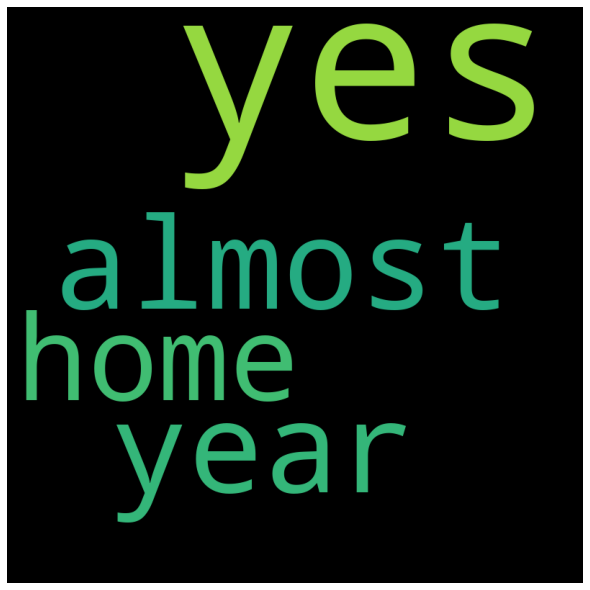

In [ ]:
word_cloud(df[df['Gender']=='Male']['Were you at your hometown during covid times?'])

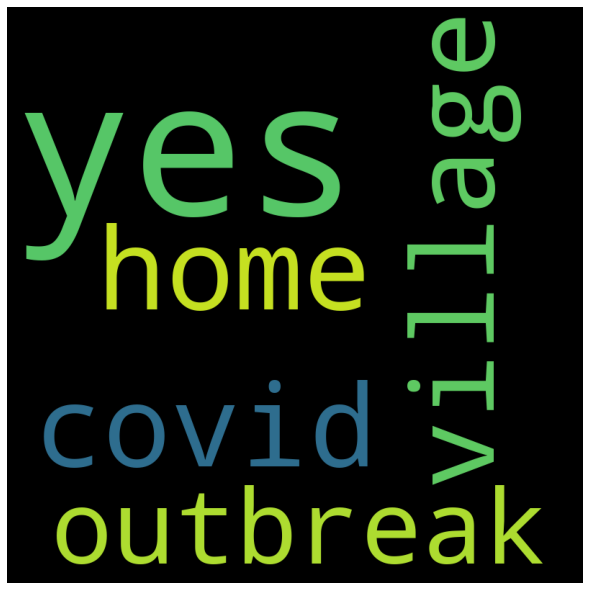

In [ ]:
word_cloud(df[df['Gender']=='Female']['Were you at your hometown during covid times?'])

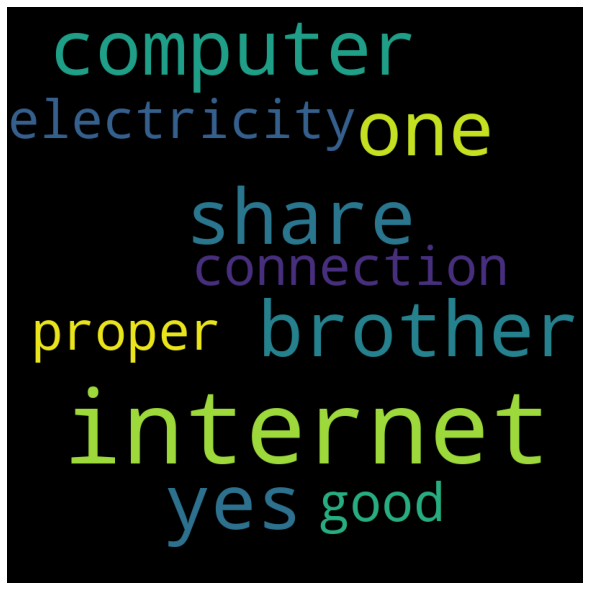

In [ ]:
word_cloud(df[df['Gender']=='Male']['Were you provided with appropriate resources?'])

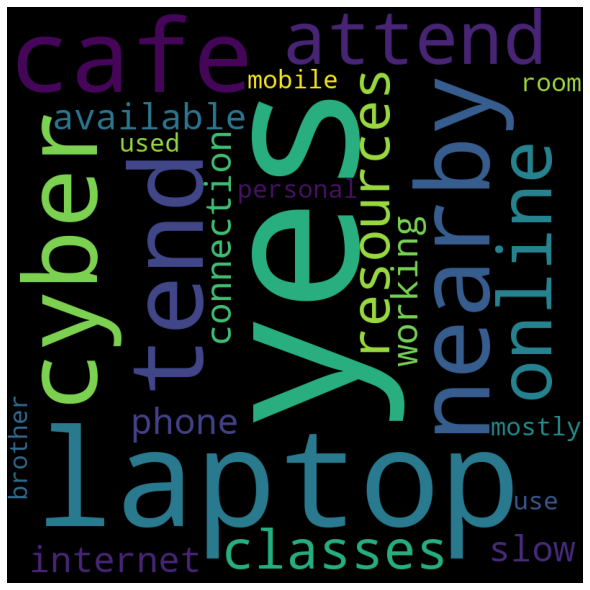

In [ ]:
word_cloud(df[df['Gender']=='Female']['Were you provided with appropriate resources?'])

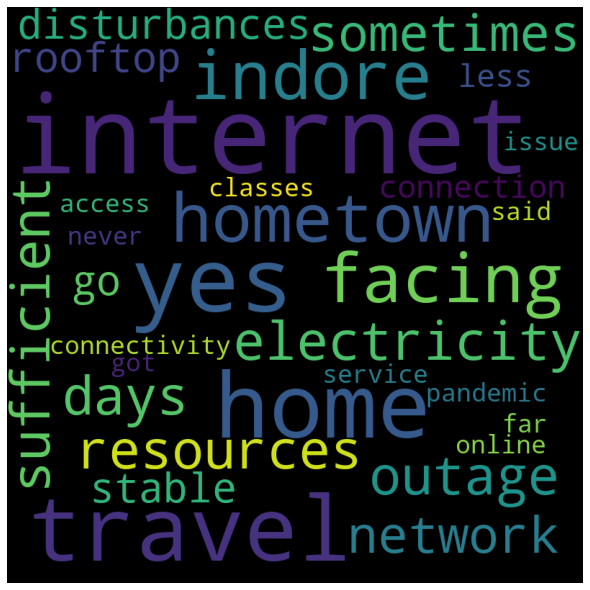

In [ ]:
word_cloud(df[df['Gender']=='Male']['Do/Did you have to travel far from your home to access internet services or other resources required for online education?'])

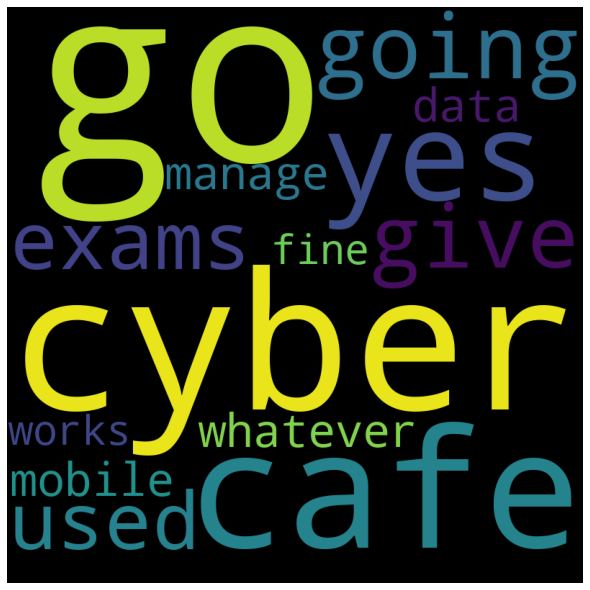

In [ ]:
word_cloud(df[df['Gender']=='Female']['Do/Did you have to travel far from your home to access internet services or other resources required for online education?'])

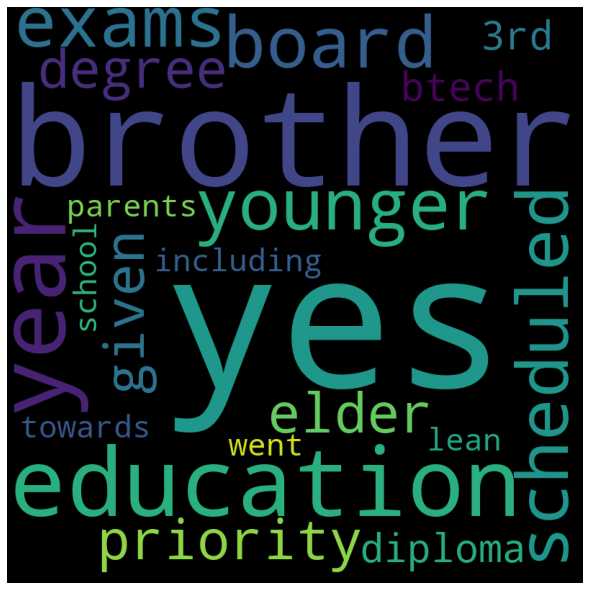

In [ ]:
word_cloud(df[df['Gender']=='Male']['Do you have any siblings? Equality in terms of education'])

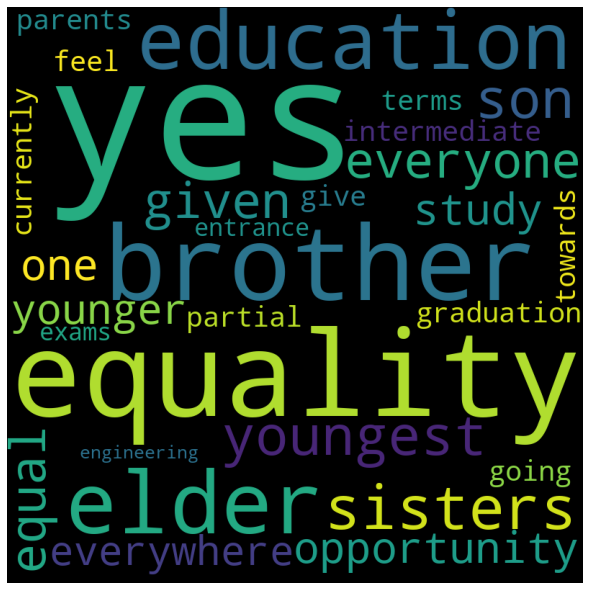

In [ ]:
word_cloud(df[df['Gender']=='Female']['Do you have any siblings? Equality in terms of education'])

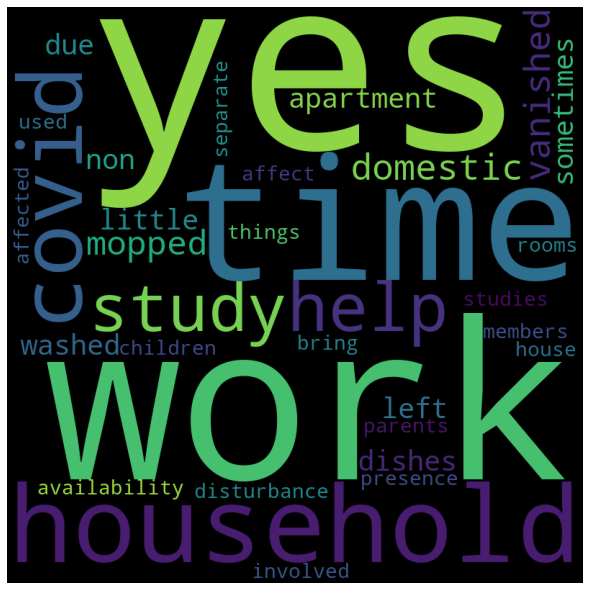

In [ ]:
word_cloud(df[df['Gender']=='Male']['Did Household work affect your studies? How?'])

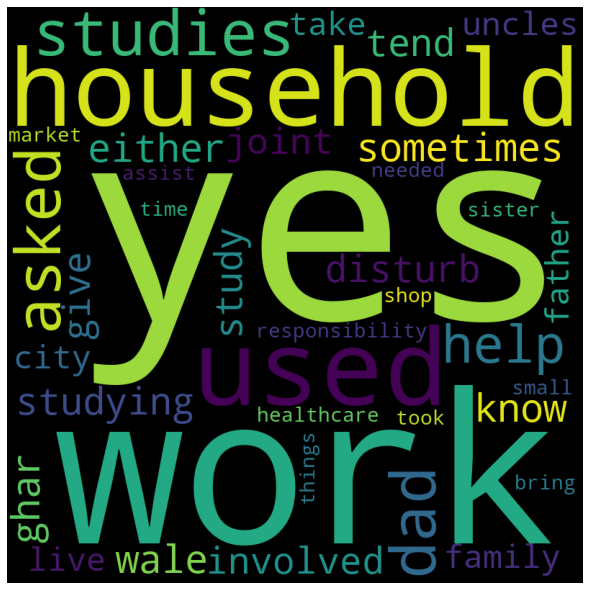

In [ ]:
word_cloud(df[df['Gender']=='Female']['Did Household work affect your studies? How?'])

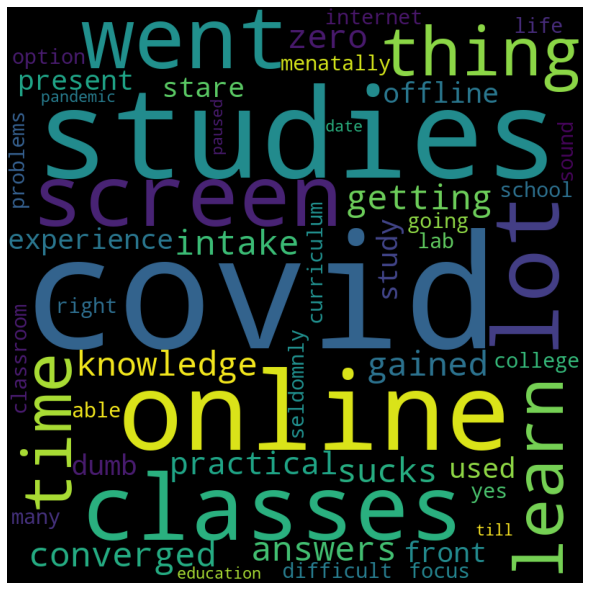

In [ ]:
word_cloud(df[df['Gender']=='Male']['Comparison in between your studies before and after covid'])

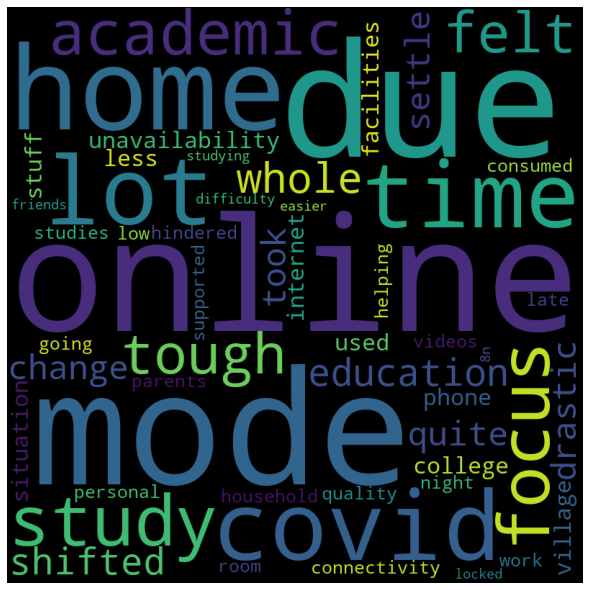

In [ ]:
word_cloud(df[df['Gender']=='Female']['Comparison in between your studies before and after covid'])

In [ ]:
data_csv = pd.read_csv('/content/Digital Divide Survey (Responses) - Form Responses 1.csv')
data_csv = data_csv.fillna(value='No_Fill')
data_csv

,Timestamp,Level of education,Place of Hometown,What kind of difficulties did you face during online mode of education?,Do/Did you have to travel far for your home to access internet services or other resources required for online education?,Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?,Did you struggle with learning to operate various software in online mode of education?,How much would you rate your technology literacy?
0,10/29/2021 21:00:58,Undergraduate,Metropolitan City,"Poor bandwidth, Power cuts",No,Maybe,Yes,8
1,10/29/2021 21:09:29,Undergraduate,Metropolitan City,Limited network,No,Maybe,Yes,9
2,10/30/2021 10:22:41,Undergraduate,Metropolitan City,Poor bandwidth,No,Maybe,No,10
3,11/6/2021 21:15:51,Undergraduate,Metropolitan City,No_Fill,No,Maybe,No,9
4,11/6/2021 21:43:45,Undergraduate,Metropolitan City,Limited network,No,Maybe,Yes,9
...,...,...,...,...,...,...,...,...
66,11/10/2021 15:42:15,Undergraduate,Village,"Unaffordability of wifi/broadband, Power cuts,...",Yes,Yes,Yes,4
67,11/10/2021 15:45:10,Undergraduate,Village,"Limited network, Poor bandwidth, Unaffordabili...",Yes,Yes,Yes,4
68,11/10/2021 15:48:02,Undergraduate,Village,"Limited network, Poor bandwidth, Unaffordabili...",No,Yes,Yes,6
69,11/10/2021 15:50:09,Undergraduate,Village,"Limited network, Poor bandwidth, Unaffordabili...",Yes,Yes,No,1


In [ ]:
data_csv[data_csv['Level of education']=='Undergraduate']['Place of Hometown'].value_counts()

Sub-Urban Area       33
Metropolitan City    19
Village              13
Name: Place of Hometown, dtype: int64

In [ ]:
data_csv[data_csv['Level of education']=='Undergraduate']['Place of Hometown'].value_counts().index.to_list()

['Sub-Urban Area', 'Metropolitan City', 'Village']

# Feature-Wise Quantity Analysis

In [ ]:
def single_feature(feature=None,x_label=None,y_label=None,title_bar=None,title_pie=None):
  wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
  plt.figure(figsize=(20,10))
  plt.subplot(121)
  ax = sns.countplot(x=feature)
  ax.set(xlabel=x_label, ylabel = y_label)
  ax.set_title(title_bar)
  t1 = feature.count()
  for c in ax.containers:
    labels = [f'{v.get_height()/t1*100:0.1f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
  plt.subplot(122)
  plt.pie(feature.value_counts().to_list(),labels=feature.value_counts().index.to_list(),autopct='%.2f%%',shadow=True,wedgeprops=wp)
  plt.title(title_pie)
  plt.legend()
  plt.show()
  plt.savefig('Graph_1.jpg')

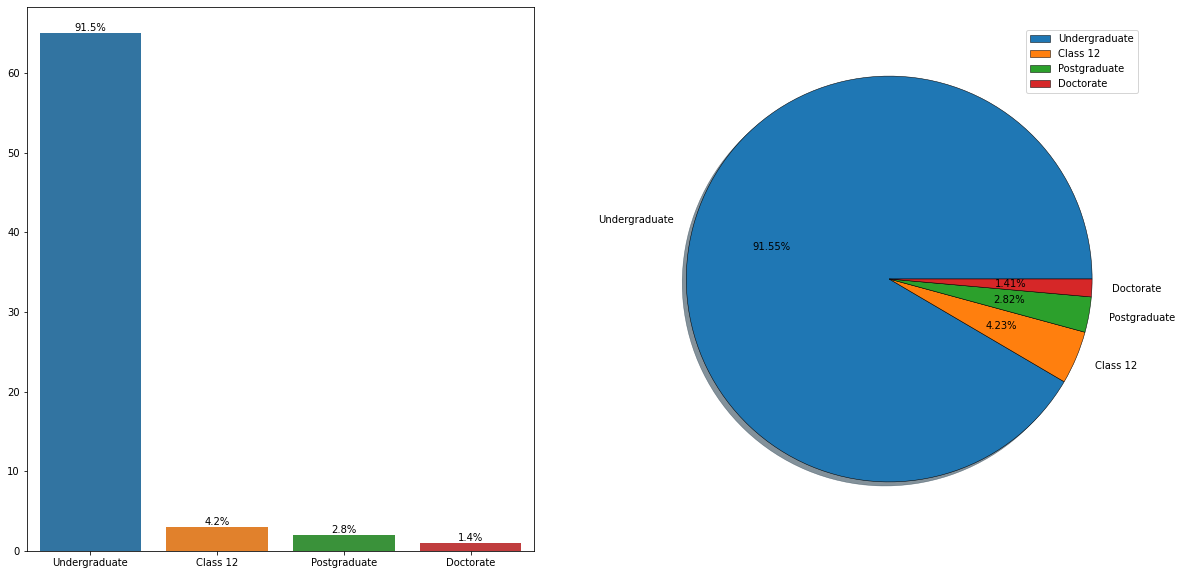

In [ ]:
single_feature(data_csv['Level of education'])

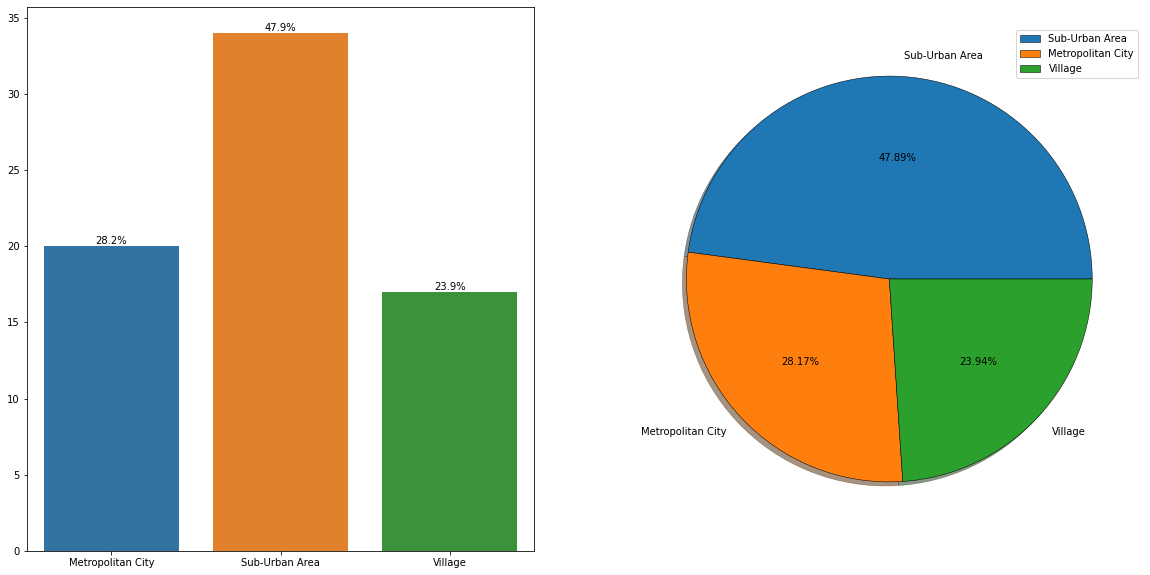

In [ ]:
single_feature(data_csv['Place of Hometown'])

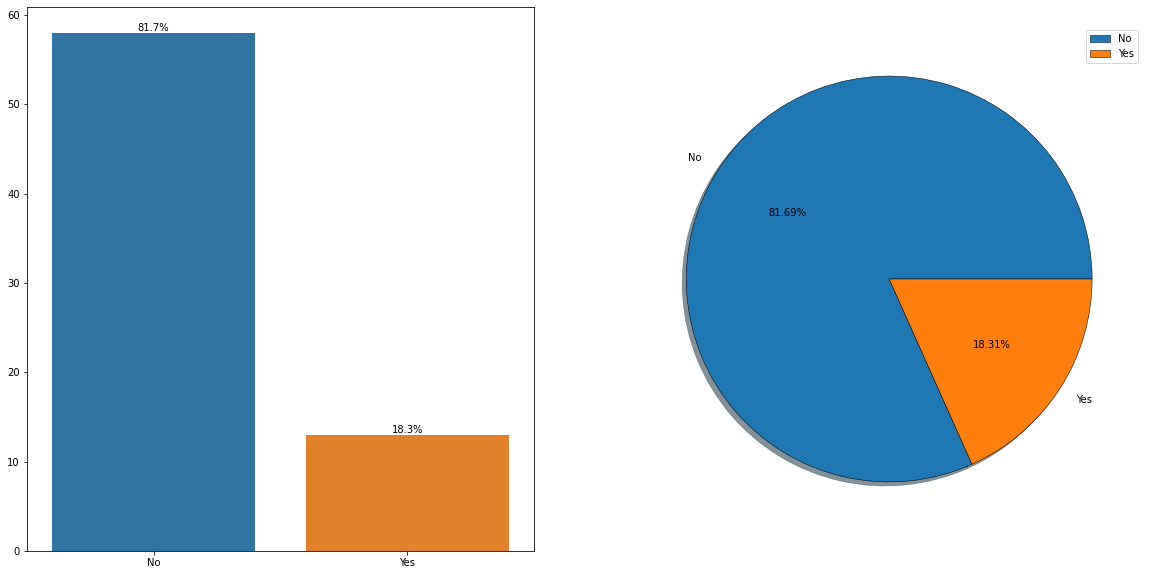

In [ ]:
single_feature(data_csv['Do/Did you have to travel far for your home to access internet services or other resources required for online education?'])

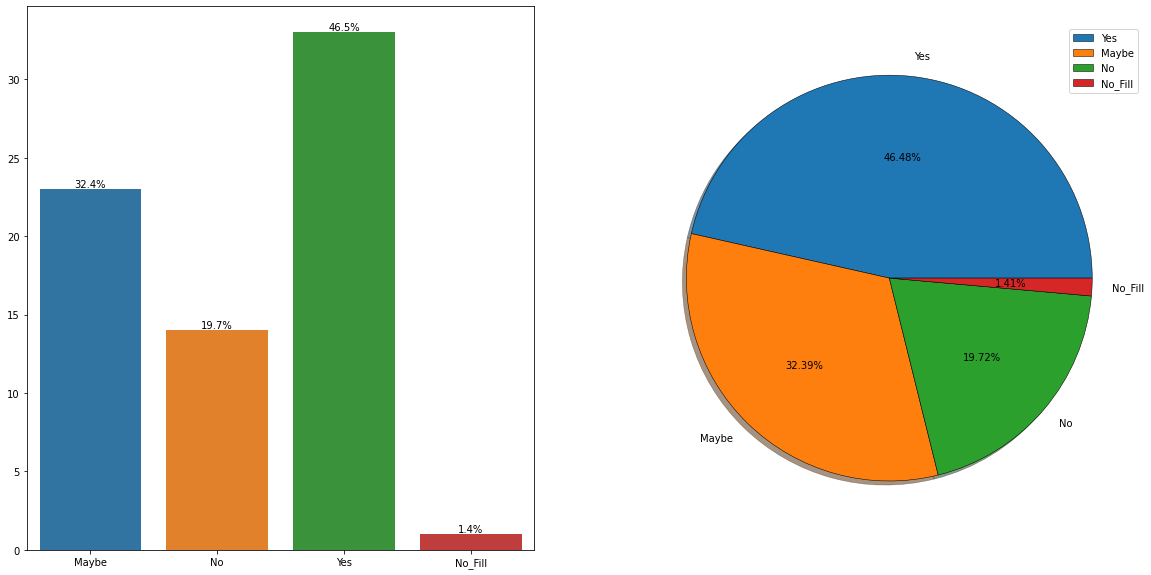

In [ ]:
single_feature(data_csv['Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?'])

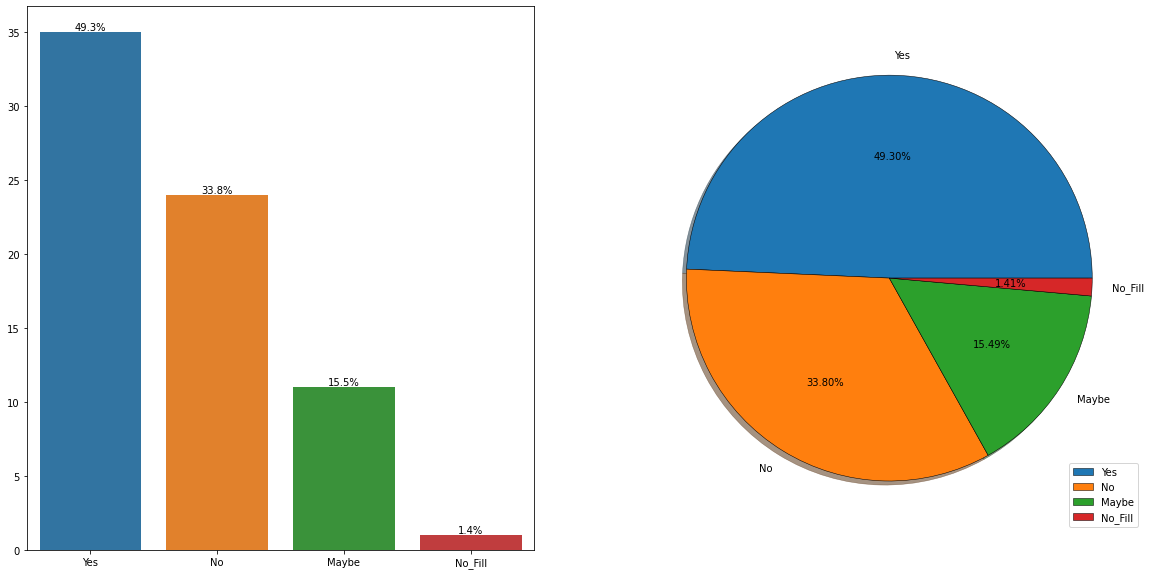

In [ ]:
single_feature(data_csv['Did you struggle with learning to operate various software in online mode of education?'])

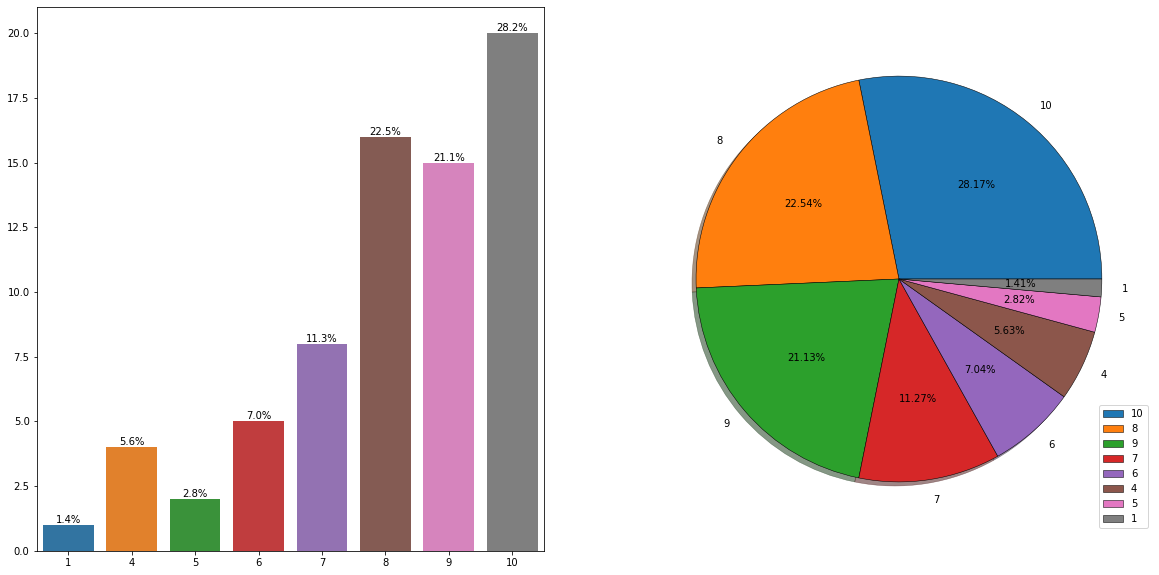

In [ ]:
single_feature(data_csv['How much would you rate your technology literacy?'])

# Inter-Features Analysis

## Analysis with respect to Level of Education

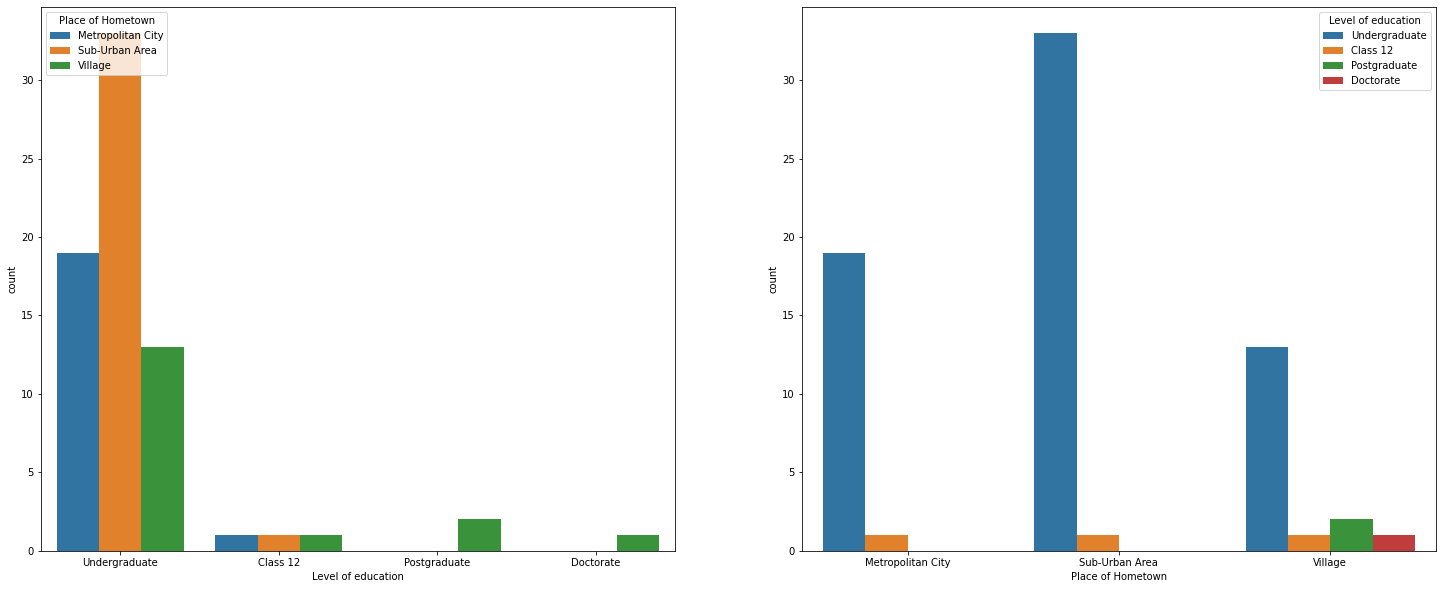

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(121)
ax = sns.countplot(x=data_csv['Level of education'],hue=data_csv['Place of Hometown'])
plt.subplot(122)
ax = sns.countplot(x=data_csv['Place of Hometown'],hue=data_csv['Level of education'])
plt.show()

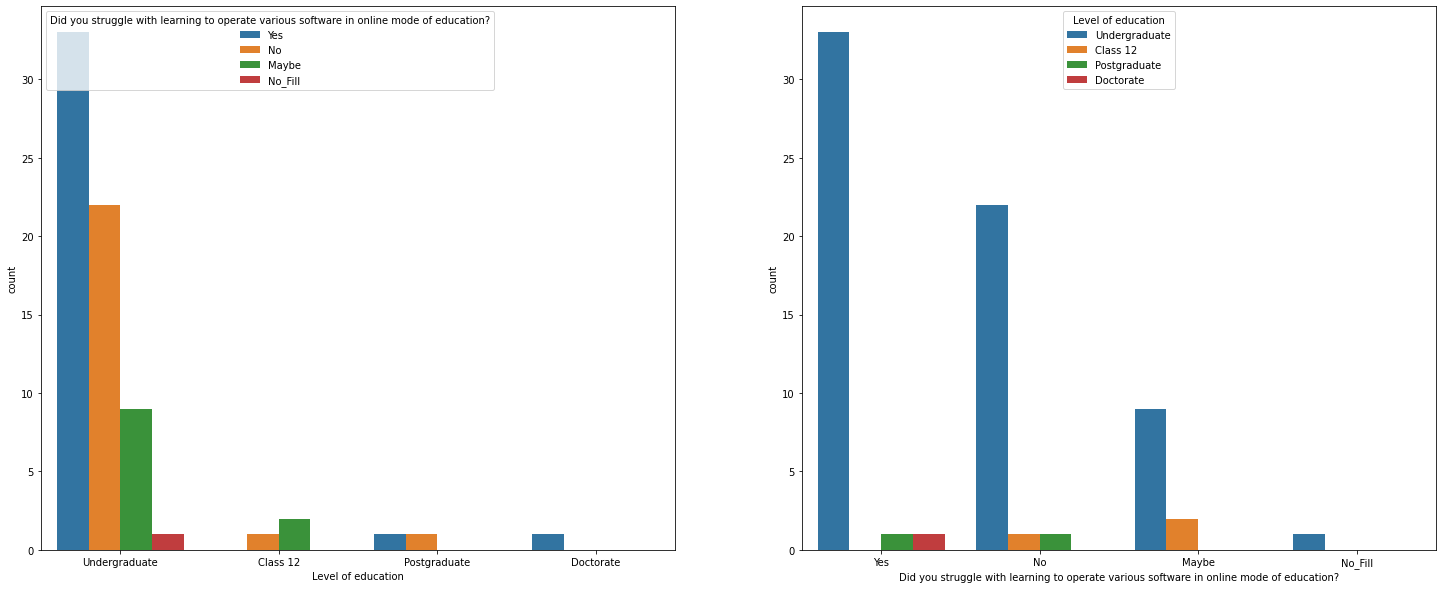

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(121)
ax = sns.countplot(x=data_csv['Level of education'],hue=data_csv['Did you struggle with learning to operate various software in online mode of education?'])
plt.subplot(122)
ax = sns.countplot(hue=data_csv['Level of education'],x=data_csv['Did you struggle with learning to operate various software in online mode of education?'])
plt.show()

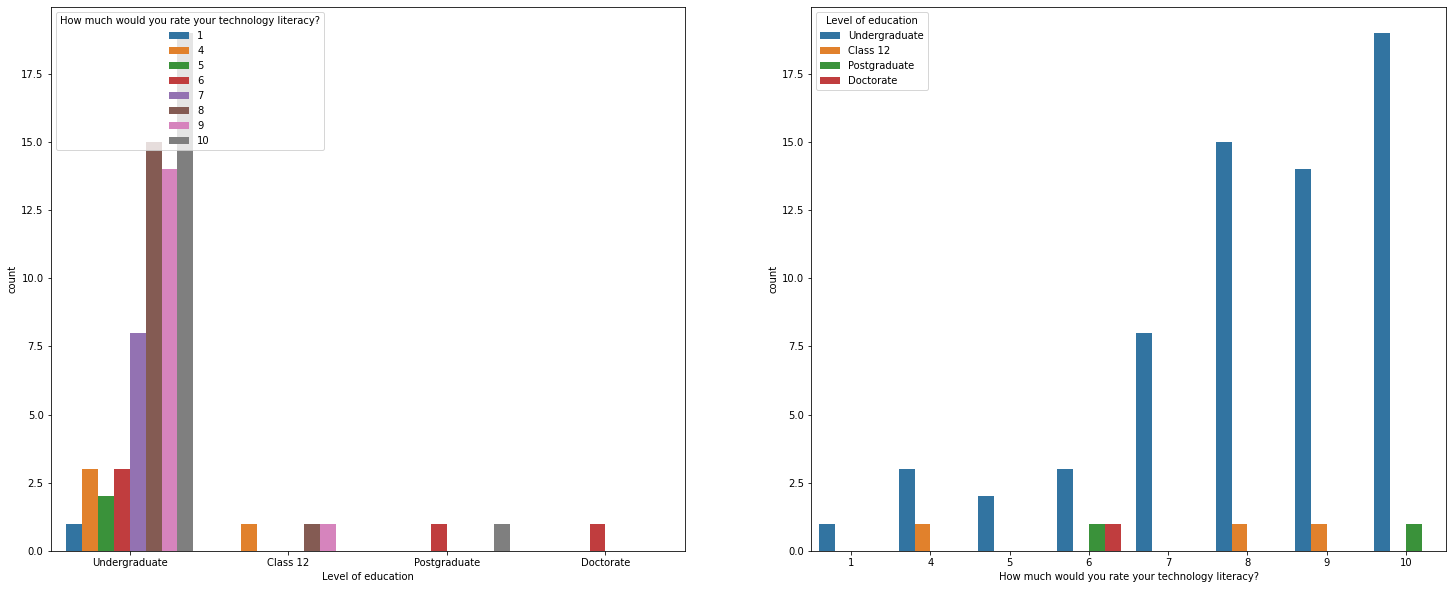

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(121)
ax = sns.countplot(x=data_csv['Level of education'],hue=data_csv['How much would you rate your technology literacy?'])
plt.subplot(122)
ax = sns.countplot(hue=data_csv['Level of education'],x=data_csv['How much would you rate your technology literacy?'])
plt.show()

## Analysis with respect to Place of Hometown

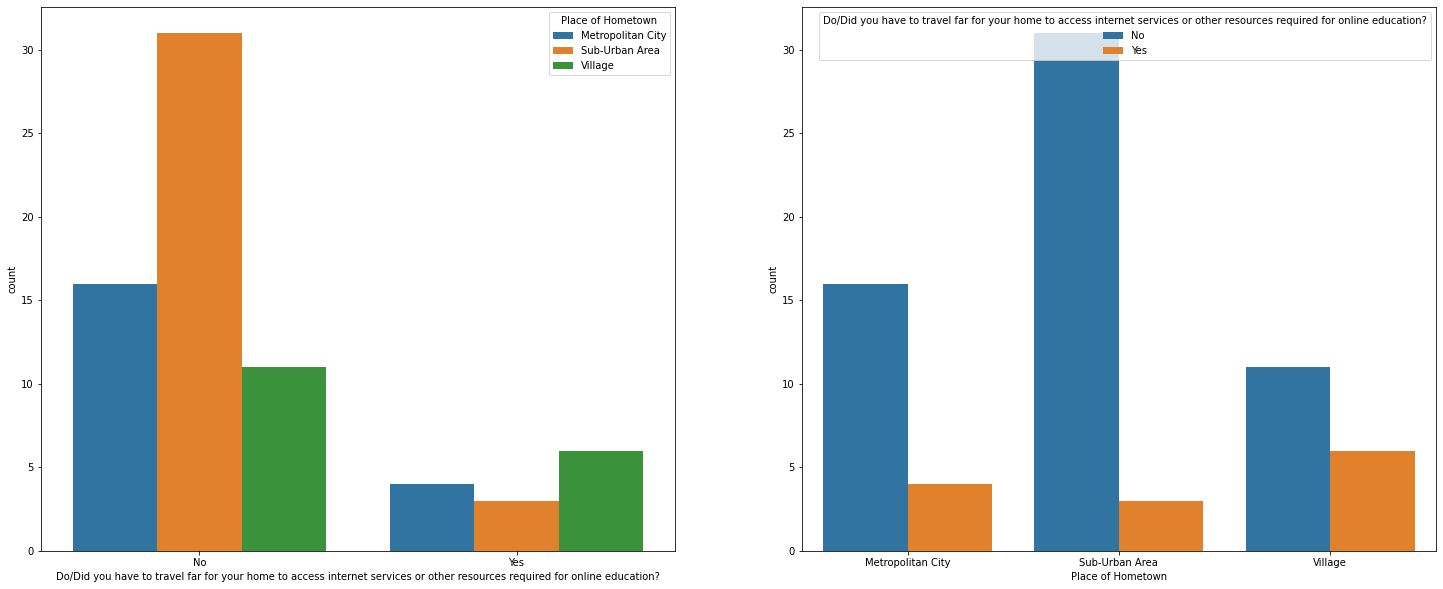

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(121)
ax = sns.countplot(x=data_csv['Do/Did you have to travel far for your home to access internet services or other resources required for online education?'],hue=data_csv['Place of Hometown'])
plt.subplot(122)
ax = sns.countplot(hue=data_csv['Do/Did you have to travel far for your home to access internet services or other resources required for online education?'],x=data_csv['Place of Hometown'])
plt.show()

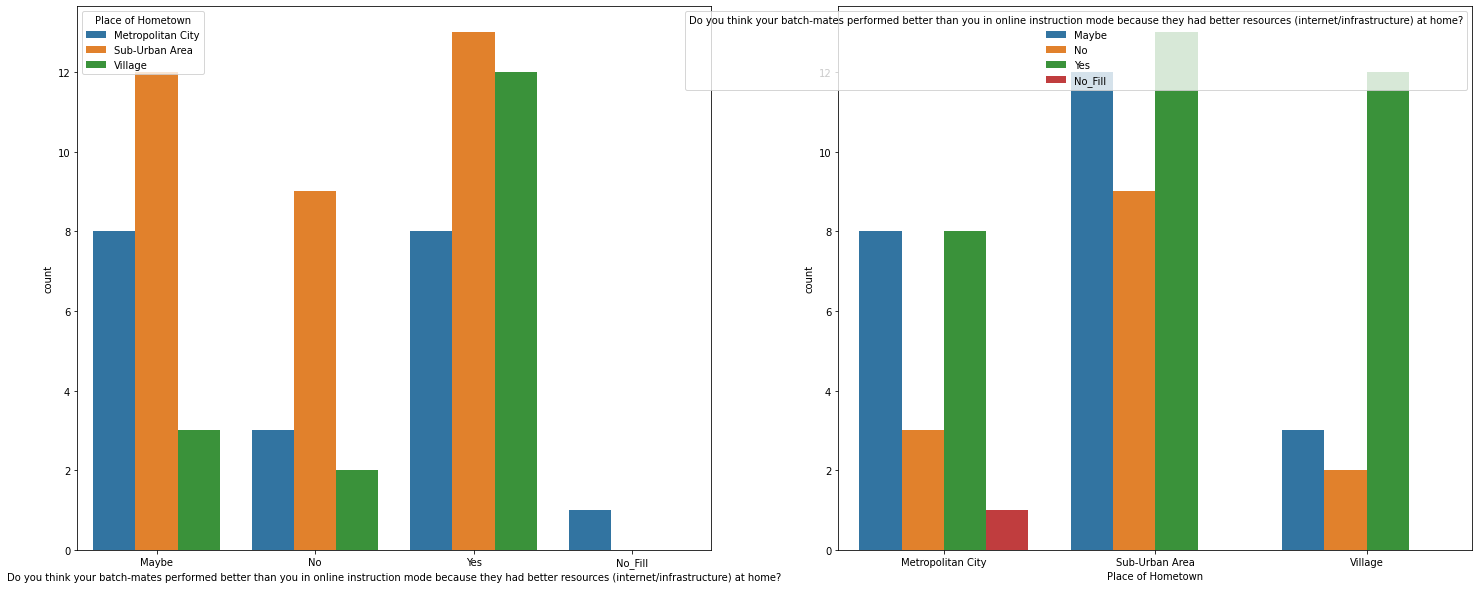

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(121)
ax = sns.countplot(x=data_csv['Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?'],hue=data_csv['Place of Hometown'])
plt.subplot(122)
ax = sns.countplot(hue=data_csv['Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?'],x=data_csv['Place of Hometown'])
plt.show()

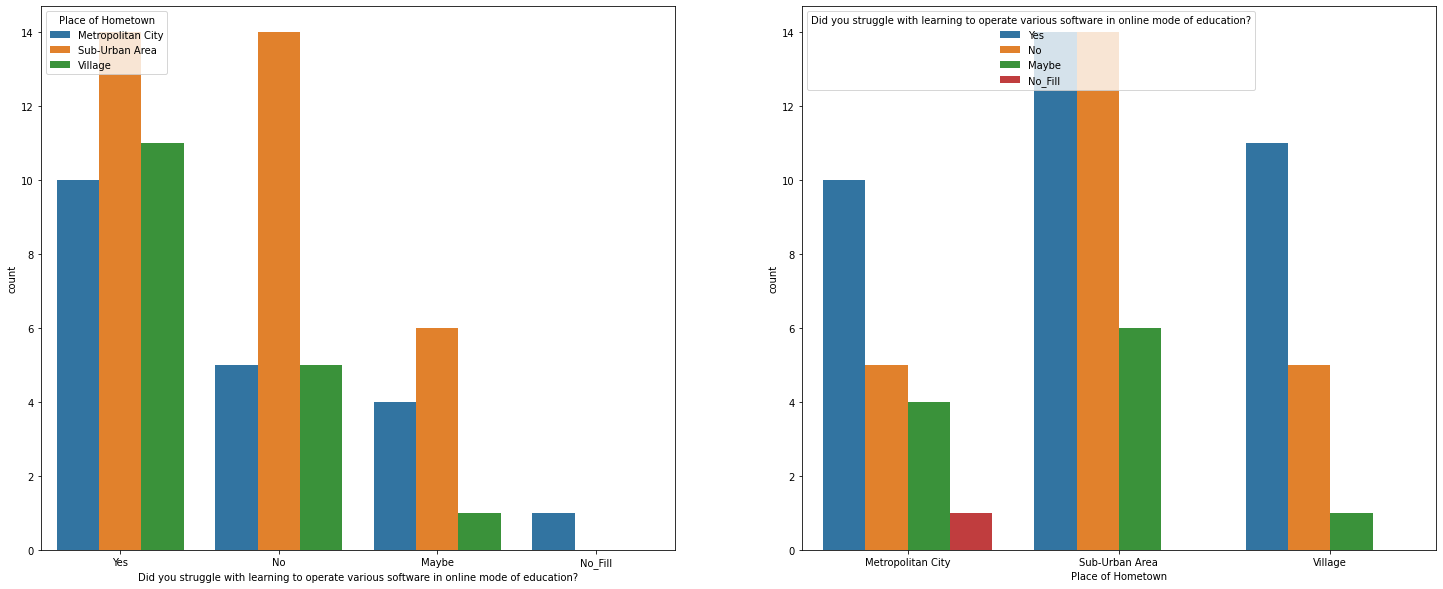

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(121)
ax = sns.countplot(x=data_csv['Did you struggle with learning to operate various software in online mode of education?'],hue=data_csv['Place of Hometown'])
plt.subplot(122)
ax = sns.countplot(x=data_csv['Place of Hometown'],hue=data_csv['Did you struggle with learning to operate various software in online mode of education?'])
plt.show()

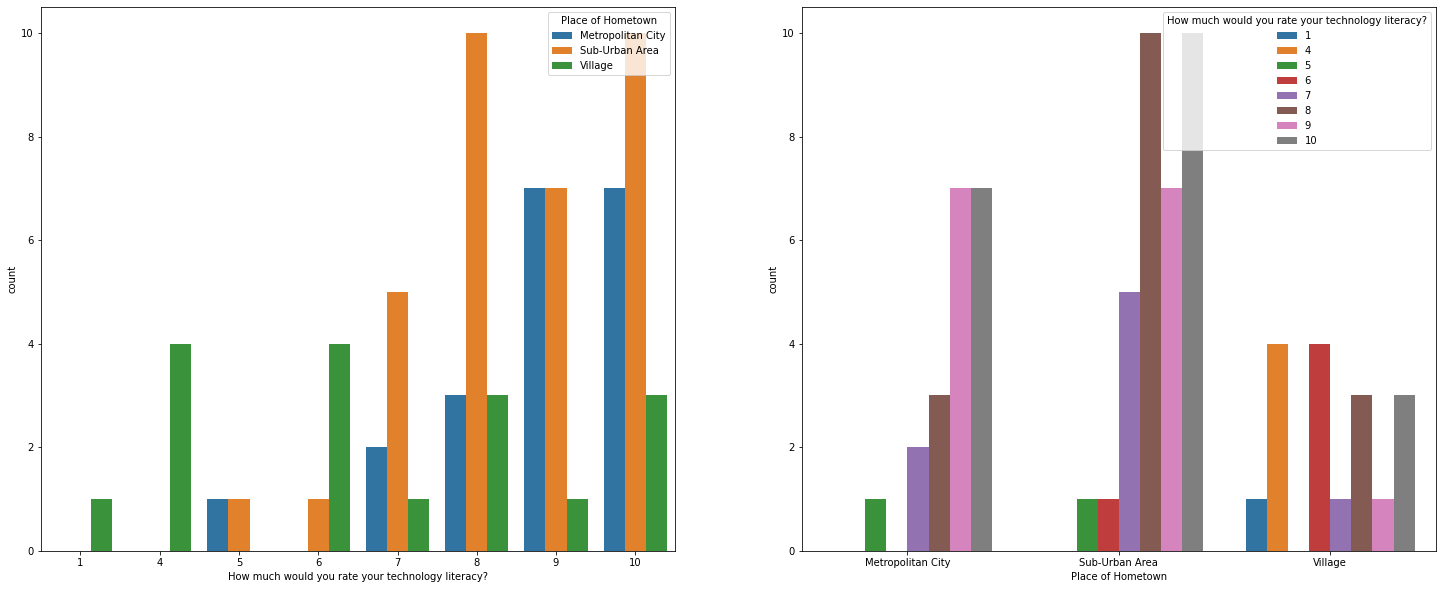

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(121)
ax = sns.countplot(x=data_csv['How much would you rate your technology literacy?'],hue=data_csv['Place of Hometown'])
plt.subplot(122)
ax = sns.countplot(x=data_csv['Place of Hometown'],hue=data_csv['How much would you rate your technology literacy?'])
plt.show()

# Individual Location-wise graphs

## Literacy Score

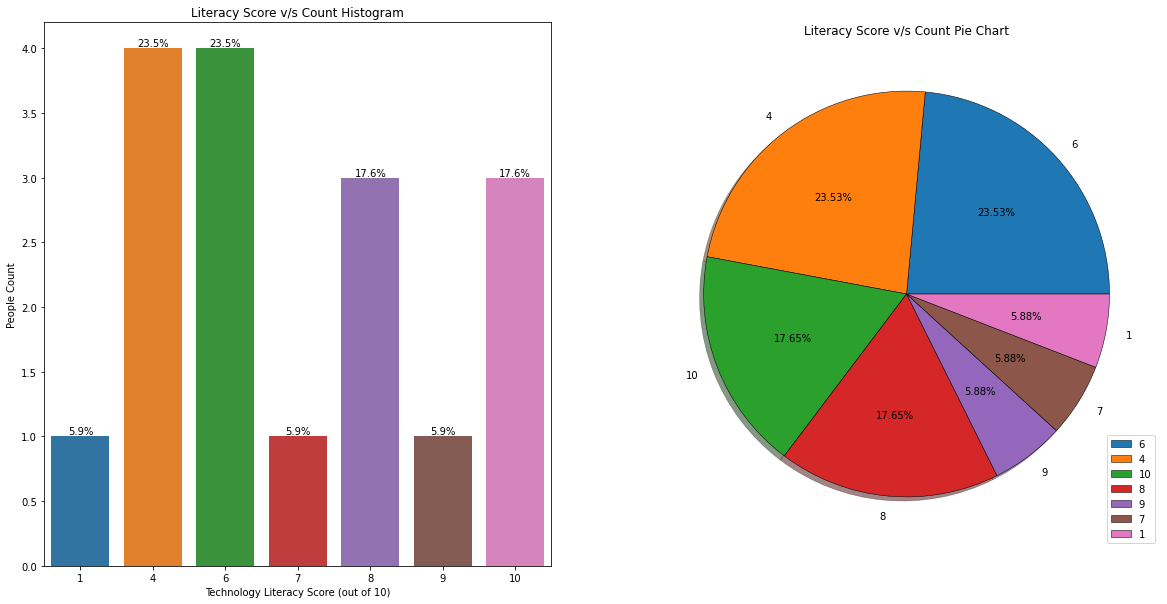

<Figure size 432x288 with 0 Axes>

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Village"]["How much would you rate your technology literacy?"],'Technology Literacy Score (out of 10)','People Count','Literacy Score v/s Count Histogram','Literacy Score v/s Count Pie Chart')

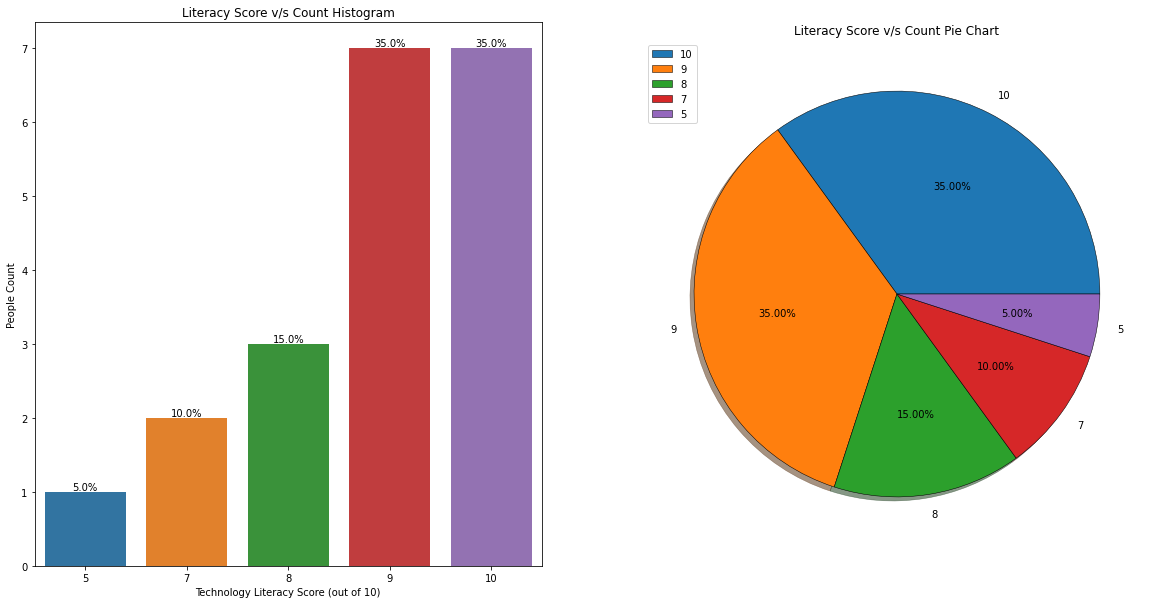

<Figure size 432x288 with 0 Axes>

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Metropolitan City"]["How much would you rate your technology literacy?"],'Technology Literacy Score (out of 10)','People Count','Literacy Score v/s Count Histogram','Literacy Score v/s Count Pie Chart')

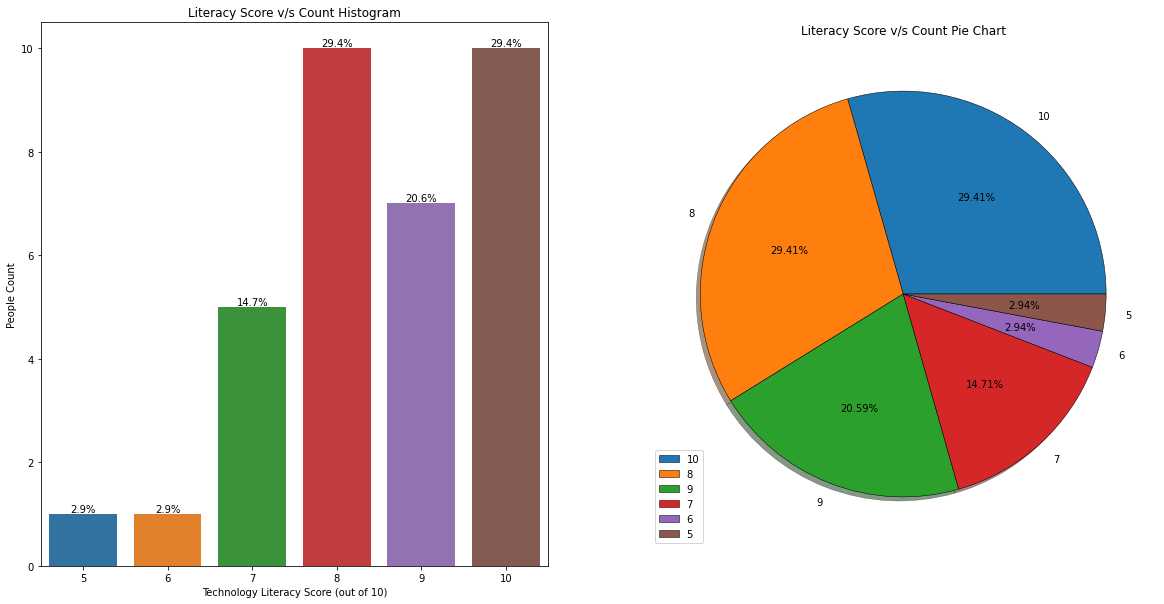

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Sub-Urban Area"]["How much would you rate your technology literacy?"],'Technology Literacy Score (out of 10)','People Count','Literacy Score v/s Count Histogram','Literacy Score v/s Count Pie Chart')

## Struggle

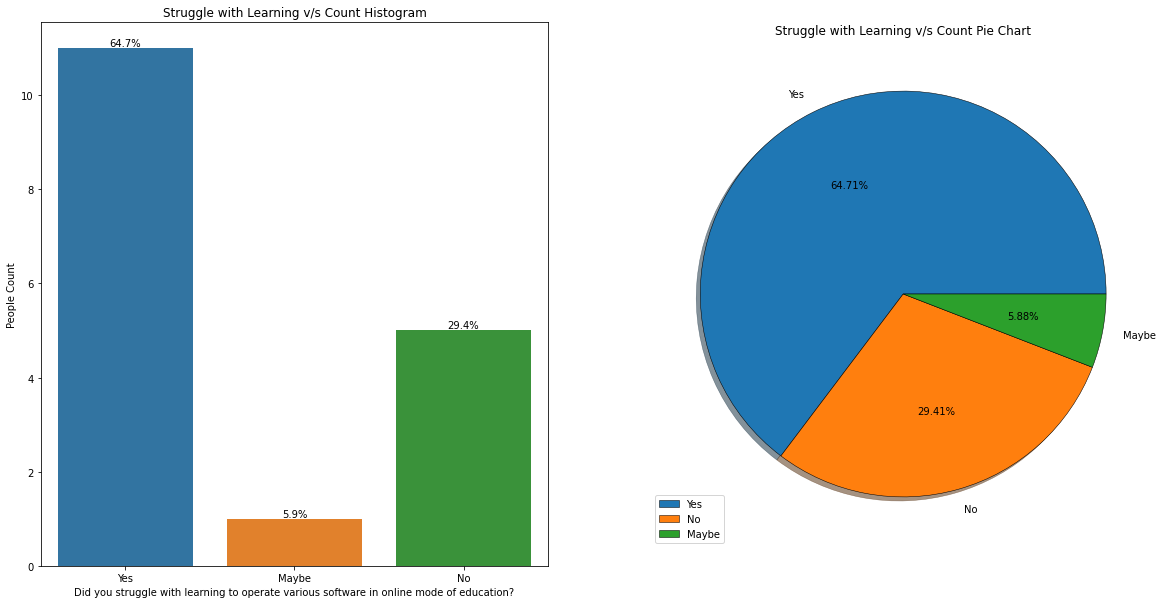

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Village"]["Did you struggle with learning to operate various software in online mode of education?"],"Did you struggle with learning to operate various software in online mode of education?",'People Count','Struggle with Learning v/s Count Histogram','Struggle with Learning v/s Count Pie Chart')

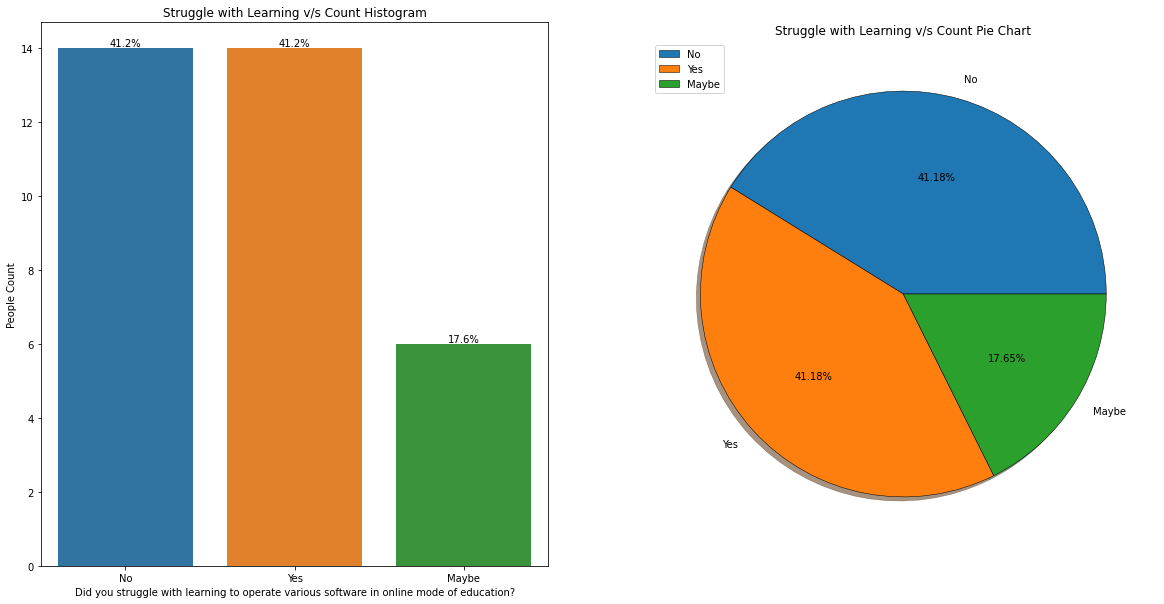

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Sub-Urban Area"]["Did you struggle with learning to operate various software in online mode of education?"],"Did you struggle with learning to operate various software in online mode of education?",'People Count','Struggle with Learning v/s Count Histogram','Struggle with Learning v/s Count Pie Chart')

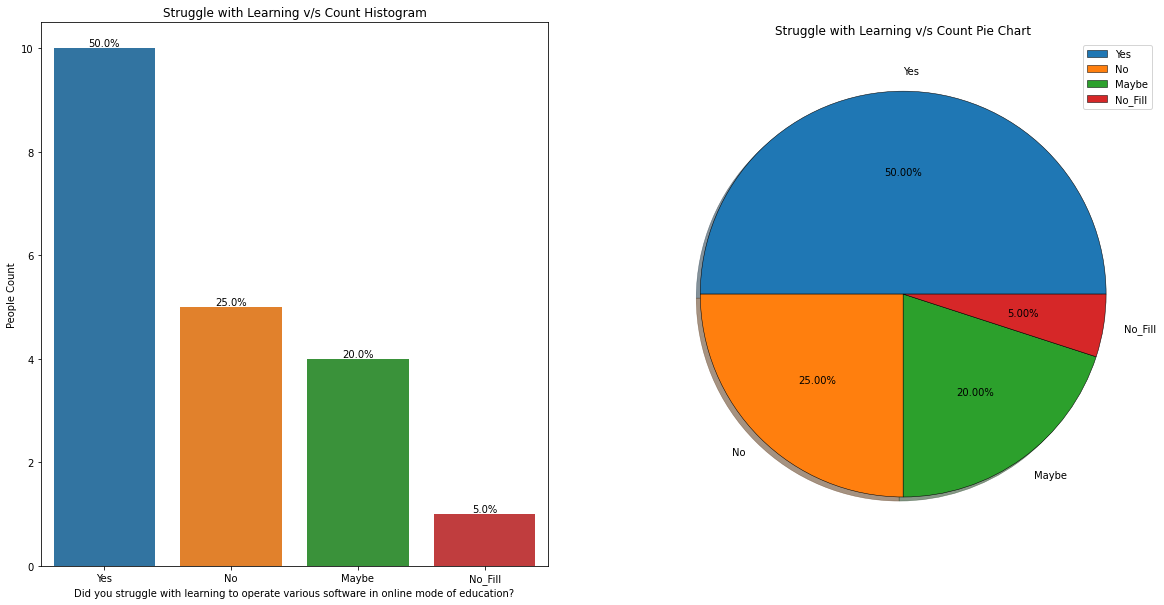

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Metropolitan City"]["Did you struggle with learning to operate various software in online mode of education?"],"Did you struggle with learning to operate various software in online mode of education?",'People Count','Struggle with Learning v/s Count Histogram','Struggle with Learning v/s Count Pie Chart')

## Batchmates

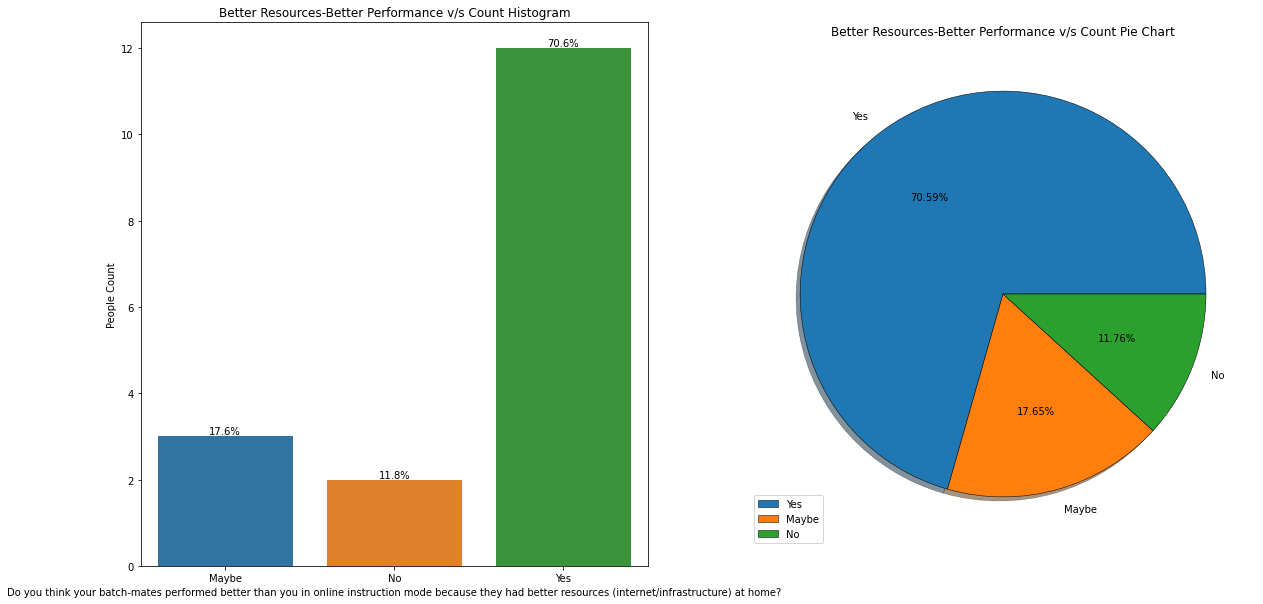

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Village"]["Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?"],"Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?",'People Count','Better Resources-Better Performance v/s Count Histogram','Better Resources-Better Performance v/s Count Pie Chart')

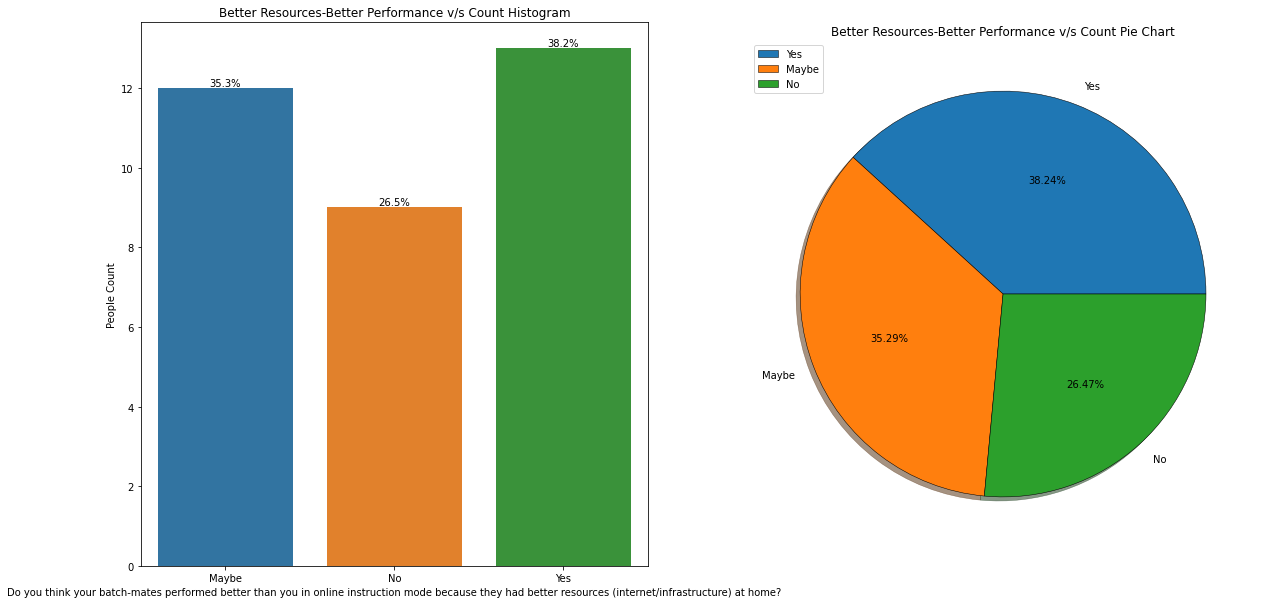

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Sub-Urban Area"]["Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?"],"Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?",'People Count','Better Resources-Better Performance v/s Count Histogram','Better Resources-Better Performance v/s Count Pie Chart')

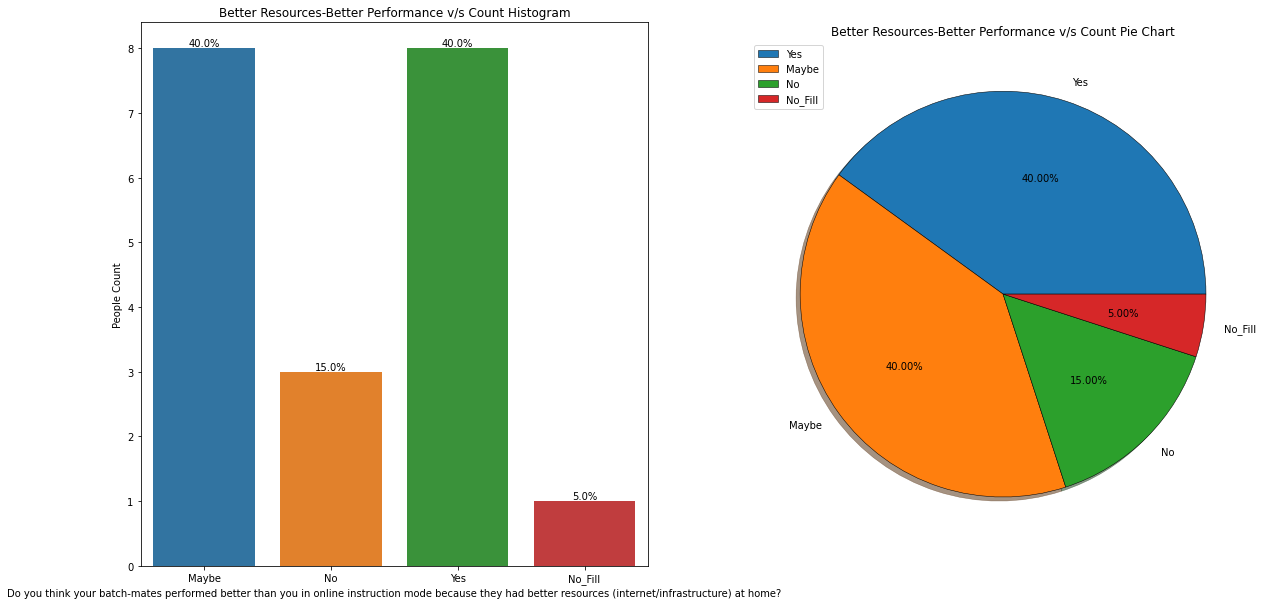

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Metropolitan City"]["Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?"],"Do you think your batch-mates performed better than you in online instruction mode because they had better resources (internet/infrastructure) at home?",'People Count','Better Resources-Better Performance v/s Count Histogram','Better Resources-Better Performance v/s Count Pie Chart')

## Travel

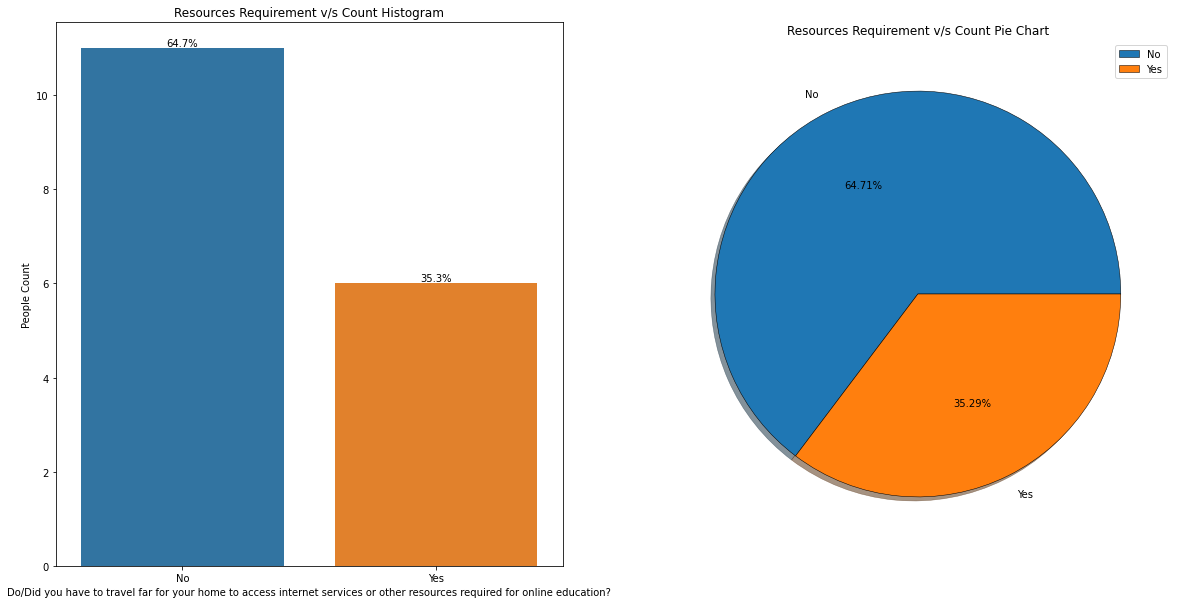

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Village"]["Do/Did you have to travel far for your home to access internet services or other resources required for online education?"],"Do/Did you have to travel far for your home to access internet services or other resources required for online education?",'People Count','Resources Requirement v/s Count Histogram','Resources Requirement v/s Count Pie Chart')

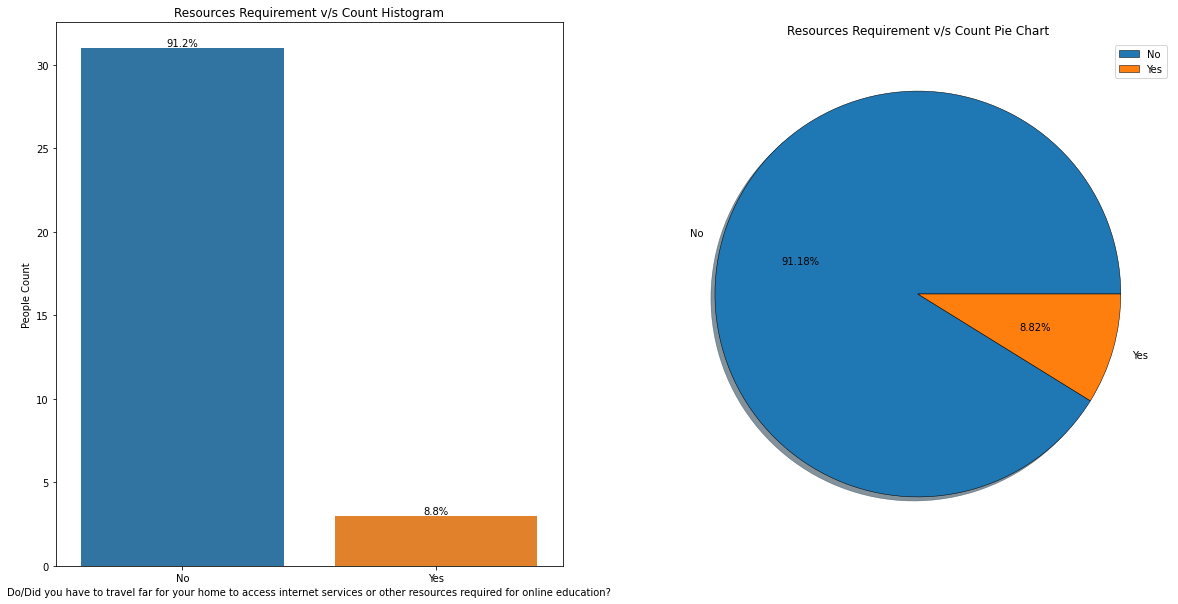

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Sub-Urban Area"]["Do/Did you have to travel far for your home to access internet services or other resources required for online education?"],"Do/Did you have to travel far for your home to access internet services or other resources required for online education?",'People Count','Resources Requirement v/s Count Histogram','Resources Requirement v/s Count Pie Chart')

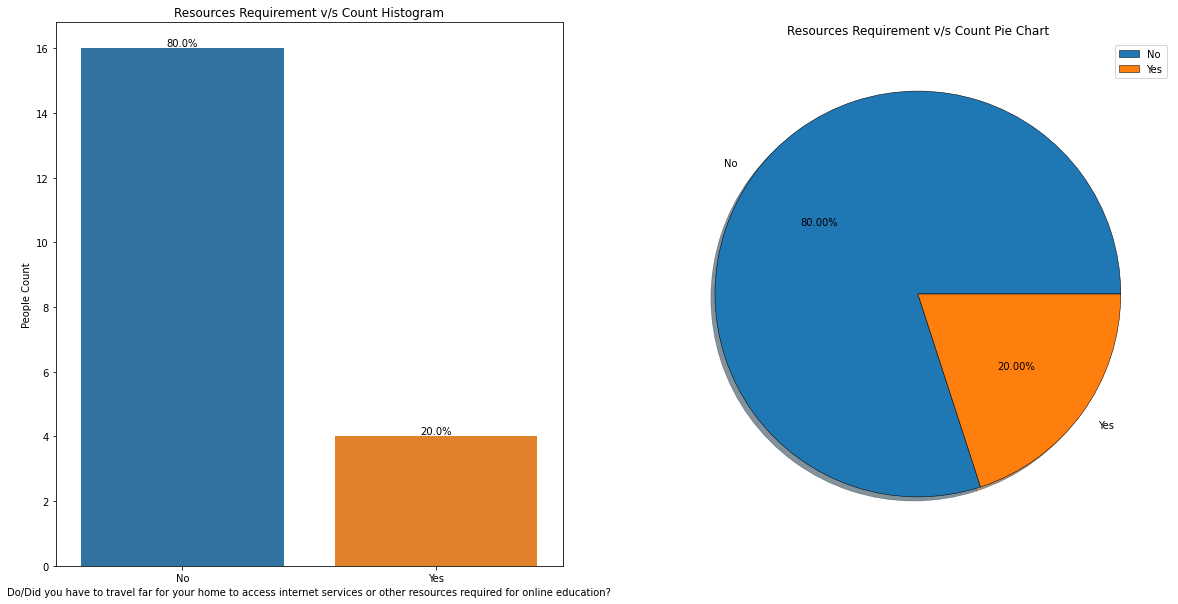

In [ ]:
single_feature(data_csv[data_csv['Place of Hometown']=="Metropolitan City"]["Do/Did you have to travel far for your home to access internet services or other resources required for online education?"],"Do/Did you have to travel far for your home to access internet services or other resources required for online education?",'People Count','Resources Requirement v/s Count Histogram','Resources Requirement v/s Count Pie Chart')